In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, DateLocator
%matplotlib inline

In [5]:
payments = pd.read_sas('./data/rata_s_srs_an.sas7bdat', encoding='unicode_escape')

In [6]:
contracts = pd.read_sas('./data/cntrct_srs_an.sas7bdat', encoding='unicode_escape')

## 3 different ways of doing charts
- Plotting capabilities of Pandas.
- MATLAB-like syntax of Matplotlib.
- Objected-oriented way. 

### Pandas style

In [9]:
contracts.head()

,COD_FASE_OPE,COD_TIPO_OPE,COD_STT_OPE,DAT_INS,DAT_INZ_OPE,DAT_END_OPE_P,DAT_END_OPE,Contract_ID,Instit_ID
0,UP,IU,NaN,17223.0,17226.0,17956.0,17866.0,S_000001,H_002
1,EX,HU,NaN,17223.0,17241.0,19807.0,NaN,S_000006,H_002
2,UK,SU,NaN,17233.0,17233.0,17582.0,17591.0,S_000029,H_002
3,UP,OU,NaN,17237.0,17238.0,20870.0,17652.0,S_000040,H_002
4,EX,HU,NaN,17244.0,17324.0,27661.0,NaN,S_000066,H_002


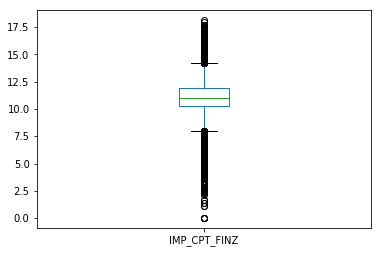

In [12]:
payments['IMP_CPT_FINZ'].apply(lambda x: np.log(x)).plot.box()

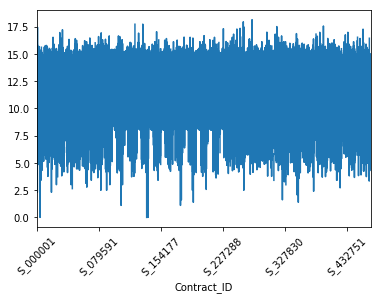

In [20]:
payments.set_index('Contract_ID')['IMP_CPT_FINZ'].apply(lambda x: np.log(x)).plot(rot=45)

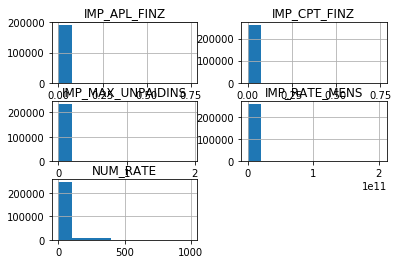

In [28]:
payments.hist();

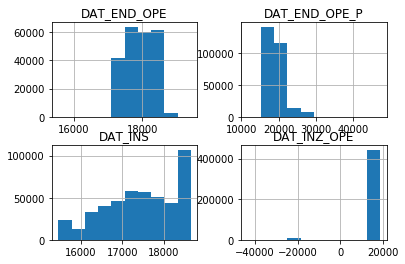

In [30]:
contracts.hist();

In [15]:
#contracts['COD_FASE_OPE'].hist()

## Matplotlib - MATLAB style / base R plots

In [31]:
payments.head()

,COD_PRDA_RATE,IMP_APL_FINZ,IMP_CPT_FINZ,NUM_RATE,IMP_RATE_MENS,IMP_MAX_UNPAIDINS,Contract_ID
0,M,950000.0,950000.0,24.0,41310.0,NaN,S_000001
1,M,50000.0,50000.0,12.0,4611.0,NaN,S_000003
2,M,100000.0,100000.0,42.0,2960.0,0.0,S_000004
3,M,3600434.0,2324160.0,49.0,48420.0,60143.0,S_000005
4,M,211776.0,211776.0,85.0,2930.0,1256.0,S_000006


In [51]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

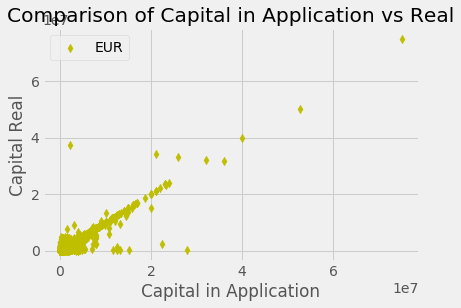

In [47]:
plt.scatter(payments['IMP_APL_FINZ'], payments['IMP_CPT_FINZ'], marker='d', c='y', label='EUR')
plt.legend(loc='upper left')
plt.grid(True)
plt.xlabel('Capital in Application')
plt.ylabel('Capital Real')
plt.style.use('fivethirtyeight')
plt.title('Comparison of Capital in Application vs Real');

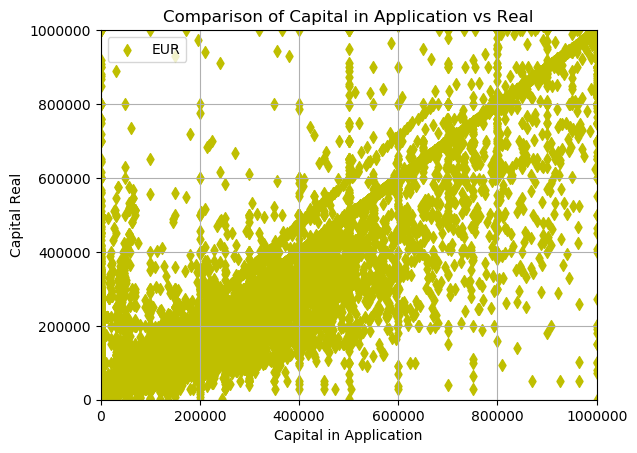

In [57]:
plt.scatter(payments['IMP_APL_FINZ'], payments['IMP_CPT_FINZ'], marker='d', c='y', label='EUR')
plt.legend(loc='upper left')
plt.grid(True)
plt.xlim(0,1e6)
plt.ylim(0,1e6)
plt.style.use('default')
plt.xlabel('Capital in Application')
plt.ylabel('Capital Real')
plt.title('Comparison of Capital in Application vs Real');
plt.savefig('my_plot.png')

In [58]:
payments.head()

,COD_PRDA_RATE,IMP_APL_FINZ,IMP_CPT_FINZ,NUM_RATE,IMP_RATE_MENS,IMP_MAX_UNPAIDINS,Contract_ID
0,M,950000.0,950000.0,24.0,41310.0,NaN,S_000001
1,M,50000.0,50000.0,12.0,4611.0,NaN,S_000003
2,M,100000.0,100000.0,42.0,2960.0,0.0,S_000004
3,M,3600434.0,2324160.0,49.0,48420.0,60143.0,S_000005
4,M,211776.0,211776.0,85.0,2930.0,1256.0,S_000006


In [65]:
payments[['IMP_RATE_MENS']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269689 entries, 0 to 269688
Data columns (total 1 columns):
IMP_RATE_MENS    260586 non-null float64
dtypes: float64(1)
memory usage: 2.1 MB


Text(0.5,0,'Monthly Rate')

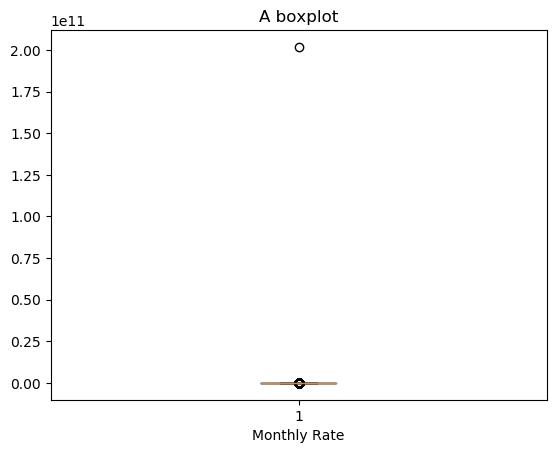

In [69]:
plt.boxplot(payments['IMP_RATE_MENS'].fillna(payments['IMP_RATE_MENS'].mean()))
plt.title('A boxplot')
plt.xlabel('Monthly Rate')

## Histograms / bar plots

In [74]:
payments[['COD_PRDA_RATE']].head()

,COD_PRDA_RATE
0,M
1,M
2,M
3,M
4,M


In [82]:
x = payments['COD_PRDA_RATE'].value_counts().index.values

In [85]:
height = payments['COD_PRDA_RATE'].value_counts().values

In [87]:
height

array([258054,  11557,     51,     12,      9,      6], dtype=int64)

<BarContainer object of 3 artists>

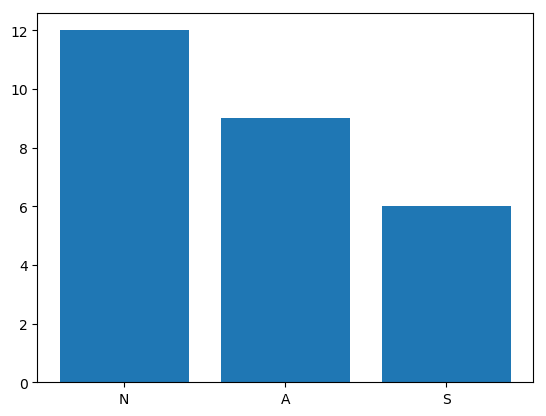

In [89]:
plt.bar(x[3:],height[3:])

## Combine Pandas and Matplotlib

In [90]:
payments.columns

Index(['COD_PRDA_RATE', 'IMP_APL_FINZ', 'IMP_CPT_FINZ', 'NUM_RATE',
       'IMP_RATE_MENS', 'IMP_MAX_UNPAIDINS', 'Contract_ID'],
      dtype='object')

In [95]:
capital_per_cat = payments.groupby('COD_PRDA_RATE')['IMP_CPT_FINZ'].mean().reset_index()

In [96]:
capital_per_cat

,COD_PRDA_RATE,IMP_CPT_FINZ
0,A,4.948496e+05
1,M,2.011674e+05
2,N,6.465252e+06
3,S,1.223761e+06
4,T,3.653297e+06
5,V,2.126372e+05


In [104]:
plt.style.use('default')

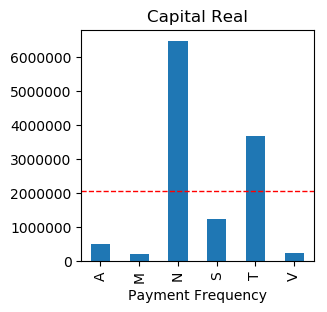

In [110]:
fig, axis = plt.subplots(figsize=(3,3))
capital_per_cat.plot(kind='bar', x='COD_PRDA_RATE', y='IMP_CPT_FINZ', ax=axis);
avg = capital_per_cat['IMP_CPT_FINZ'].mean() # Set the value for the comparison baseline
axis.axhline(y=avg, color='r', linestyle='--', linewidth=1)
axis.set(title='Capital Real', xlabel='Payment Frequency')
axis.legend().set_visible(False)

In [117]:
capital_per_cat = payments.groupby('COD_PRDA_RATE')[['IMP_CPT_FINZ', 'IMP_APL_FINZ']].mean().reset_index()

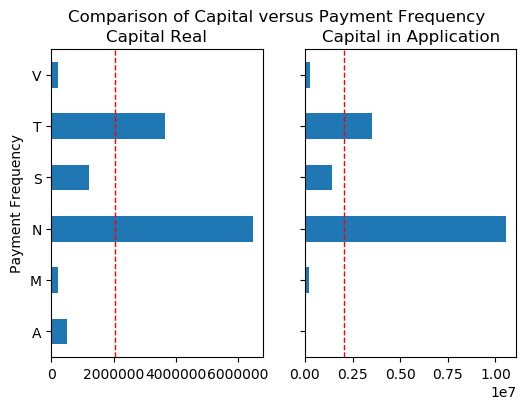

In [122]:
fig, (ax0, ax1) = plt.subplots(ncols=2, nrows=1, sharey=True, figsize=(6,4))

# Left plot
capital_per_cat.plot(kind='barh', x='COD_PRDA_RATE', y='IMP_CPT_FINZ', ax=ax0);
avg = capital_per_cat['IMP_CPT_FINZ'].mean() # Set the value for the comparison baseline
ax0.axvline(x=avg, color='r', linestyle='--', linewidth=1)
ax0.set(title='Capital Real', ylabel='Payment Frequency')
ax0.legend().set_visible(False)

# Right plot
capital_per_cat.plot(kind='barh', x='COD_PRDA_RATE', y='IMP_APL_FINZ', ax=ax1);
avg = capital_per_cat['IMP_CPT_FINZ'].mean() # Set the value for the comparison baseline
ax1.axvline(x=avg, color='r', linestyle='--', linewidth=1)
ax1.set(title='Capital in Application', ylabel='Payment Frequency')
ax1.legend().set_visible(False)

fig.suptitle('Comparison of Capital versus Payment Frequency')
fig.savefig('side_by_side.png')

## Pie charts 

In [126]:
phases = contracts['COD_FASE_OPE'].value_counts()

In [129]:
phases.index.values

array(['EX', 'UK', 'UP', 'OD', 'DO', 'ZD'], dtype=object)

In [128]:
phases.values

array([217400, 145264,  84206,  13026,   9140,   1556], dtype=int64)

In [145]:

from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

<img src='crif_logo.jpg' height=150 width=150 align=left>

# Report

This is a very important analysis...

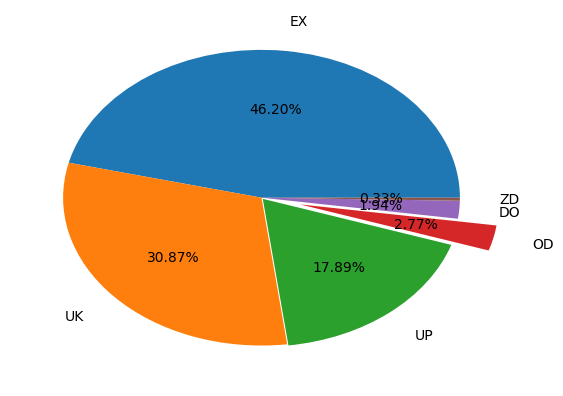

In [144]:
fig, ax = plt.subplots()
ax.pie(x=phases.values, labels=phases.index.values, 
       autopct='%1.2f%%', explode=[0, 0, 0.01, 0.2, 0, 0]
       , labeldistance=1.2, rotatelabels=False);
#fig.savefig('my_pie.png')

## Plotting time series

In [146]:
contracts.head()

,COD_FASE_OPE,COD_TIPO_OPE,COD_STT_OPE,DAT_INS,DAT_INZ_OPE,DAT_END_OPE_P,DAT_END_OPE,Contract_ID,Instit_ID
0,UP,IU,NaN,17223.0,17226.0,17956.0,17866.0,S_000001,H_002
1,EX,HU,NaN,17223.0,17241.0,19807.0,NaN,S_000006,H_002
2,UK,SU,NaN,17233.0,17233.0,17582.0,17591.0,S_000029,H_002
3,UP,OU,NaN,17237.0,17238.0,20870.0,17652.0,S_000040,H_002
4,EX,HU,NaN,17244.0,17324.0,27661.0,NaN,S_000066,H_002


In [163]:
contracts['Date'] = pd.to_datetime(contracts['DAT_INS'], unit='D', origin='1960-01-01')

In [164]:
contracts['Date'].tail()

470587   2011-01-12
470588   2011-01-12
470589   2011-01-12
470590   2011-01-12
470591   2011-01-20
Name: Date, dtype: datetime64[ns]

In [150]:
data = contracts.groupby('Date')['Contract_ID'].count()

In [165]:
data.head()

Date
2002-04-30    17374
2002-05-31      525
2002-06-30      397
2002-07-31      825
2002-08-31      265
Name: Contract_ID, dtype: int64

#### Use periods + lambda function

In [174]:
today = pd.to_datetime('2019-12-12')

In [176]:
today.to_period(freq='M')

Period('2019-12', 'M')

In [178]:
contracts['YearMonth'] = contracts['Date'].apply(lambda d: d.strftime(format='%Y-%m-%d')[:-3])
#contracts['YearMonth'] = contracts['Date'].apply(lambda d: d.to_period(freq='M'))

In [181]:
#data = contracts.groupby('YearMonth')['Contract_ID'].count() # Similar as in sol. below...

#### Resample into months

In [192]:
data = contracts.set_index('Date').resample('MS')['Contract_ID'].count()

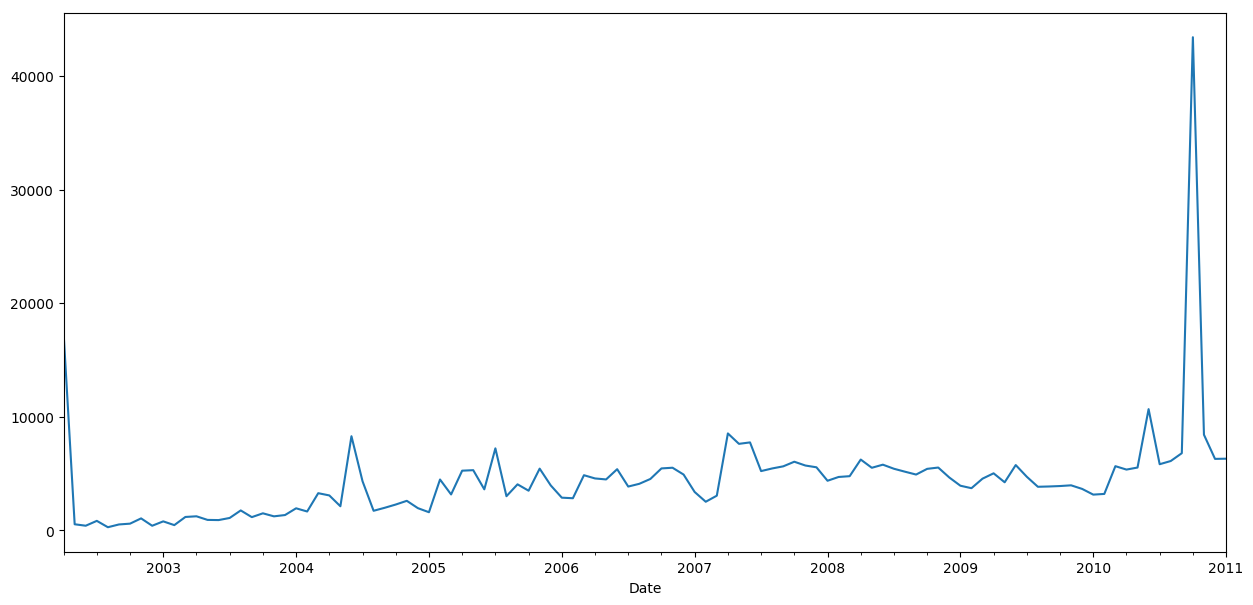

In [193]:
fig, ax = plt.subplots(figsize=(15,7))
data.plot(ax=ax)
#ax.xaxis.set_major_formatter(DateFormatter('%MS' ))